# Hackathon! prediction_of healthy life_style 

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Download and read the datasets

In [2]:
sample_df=pd.read_csv("Submission.csv")
test_df=pd.read_csv("Test_Data_life_style.csv")
train_df=pd.read_csv("Train_Data_life_style.csv")

In [3]:
sample_df

,predictions
0,0
1,1
2,1
3,1
4,0
...,...
6475,1
6476,1
6477,1
6478,0


In [4]:
train_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,DX6,58,25.515286,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,21001,39,11500,DX6,16,27.094959,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,4263,44,2796,DX1,8,28.602922,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,11208,52,12190,DX1,52,21.909832,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [5]:
test_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,23747,21,3612,DX3,27,28.880884,NO,URBAN,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6476,26138,27,4169,DX3,8,20.358229,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6477,7536,39,8525,DX6,29,27.365294,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6478,29410,29,1866,DX5,65,22.546412,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
train_df.shape, test_df.shape

((25920, 18), (6480, 17))

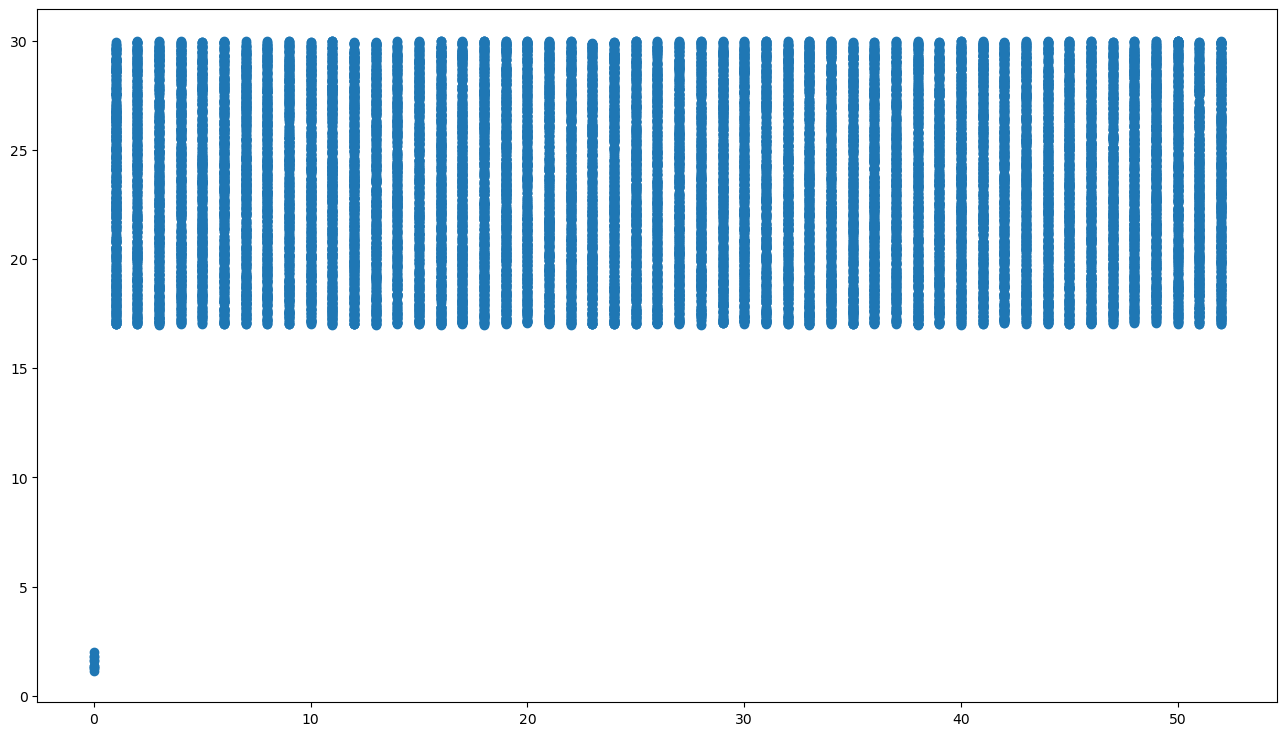

In [7]:
plt.figure(figsize=(16, 9))
x=train_df[("Specific ailments")]
y= train_df[("BMI")]
plt.scatter(x, y )

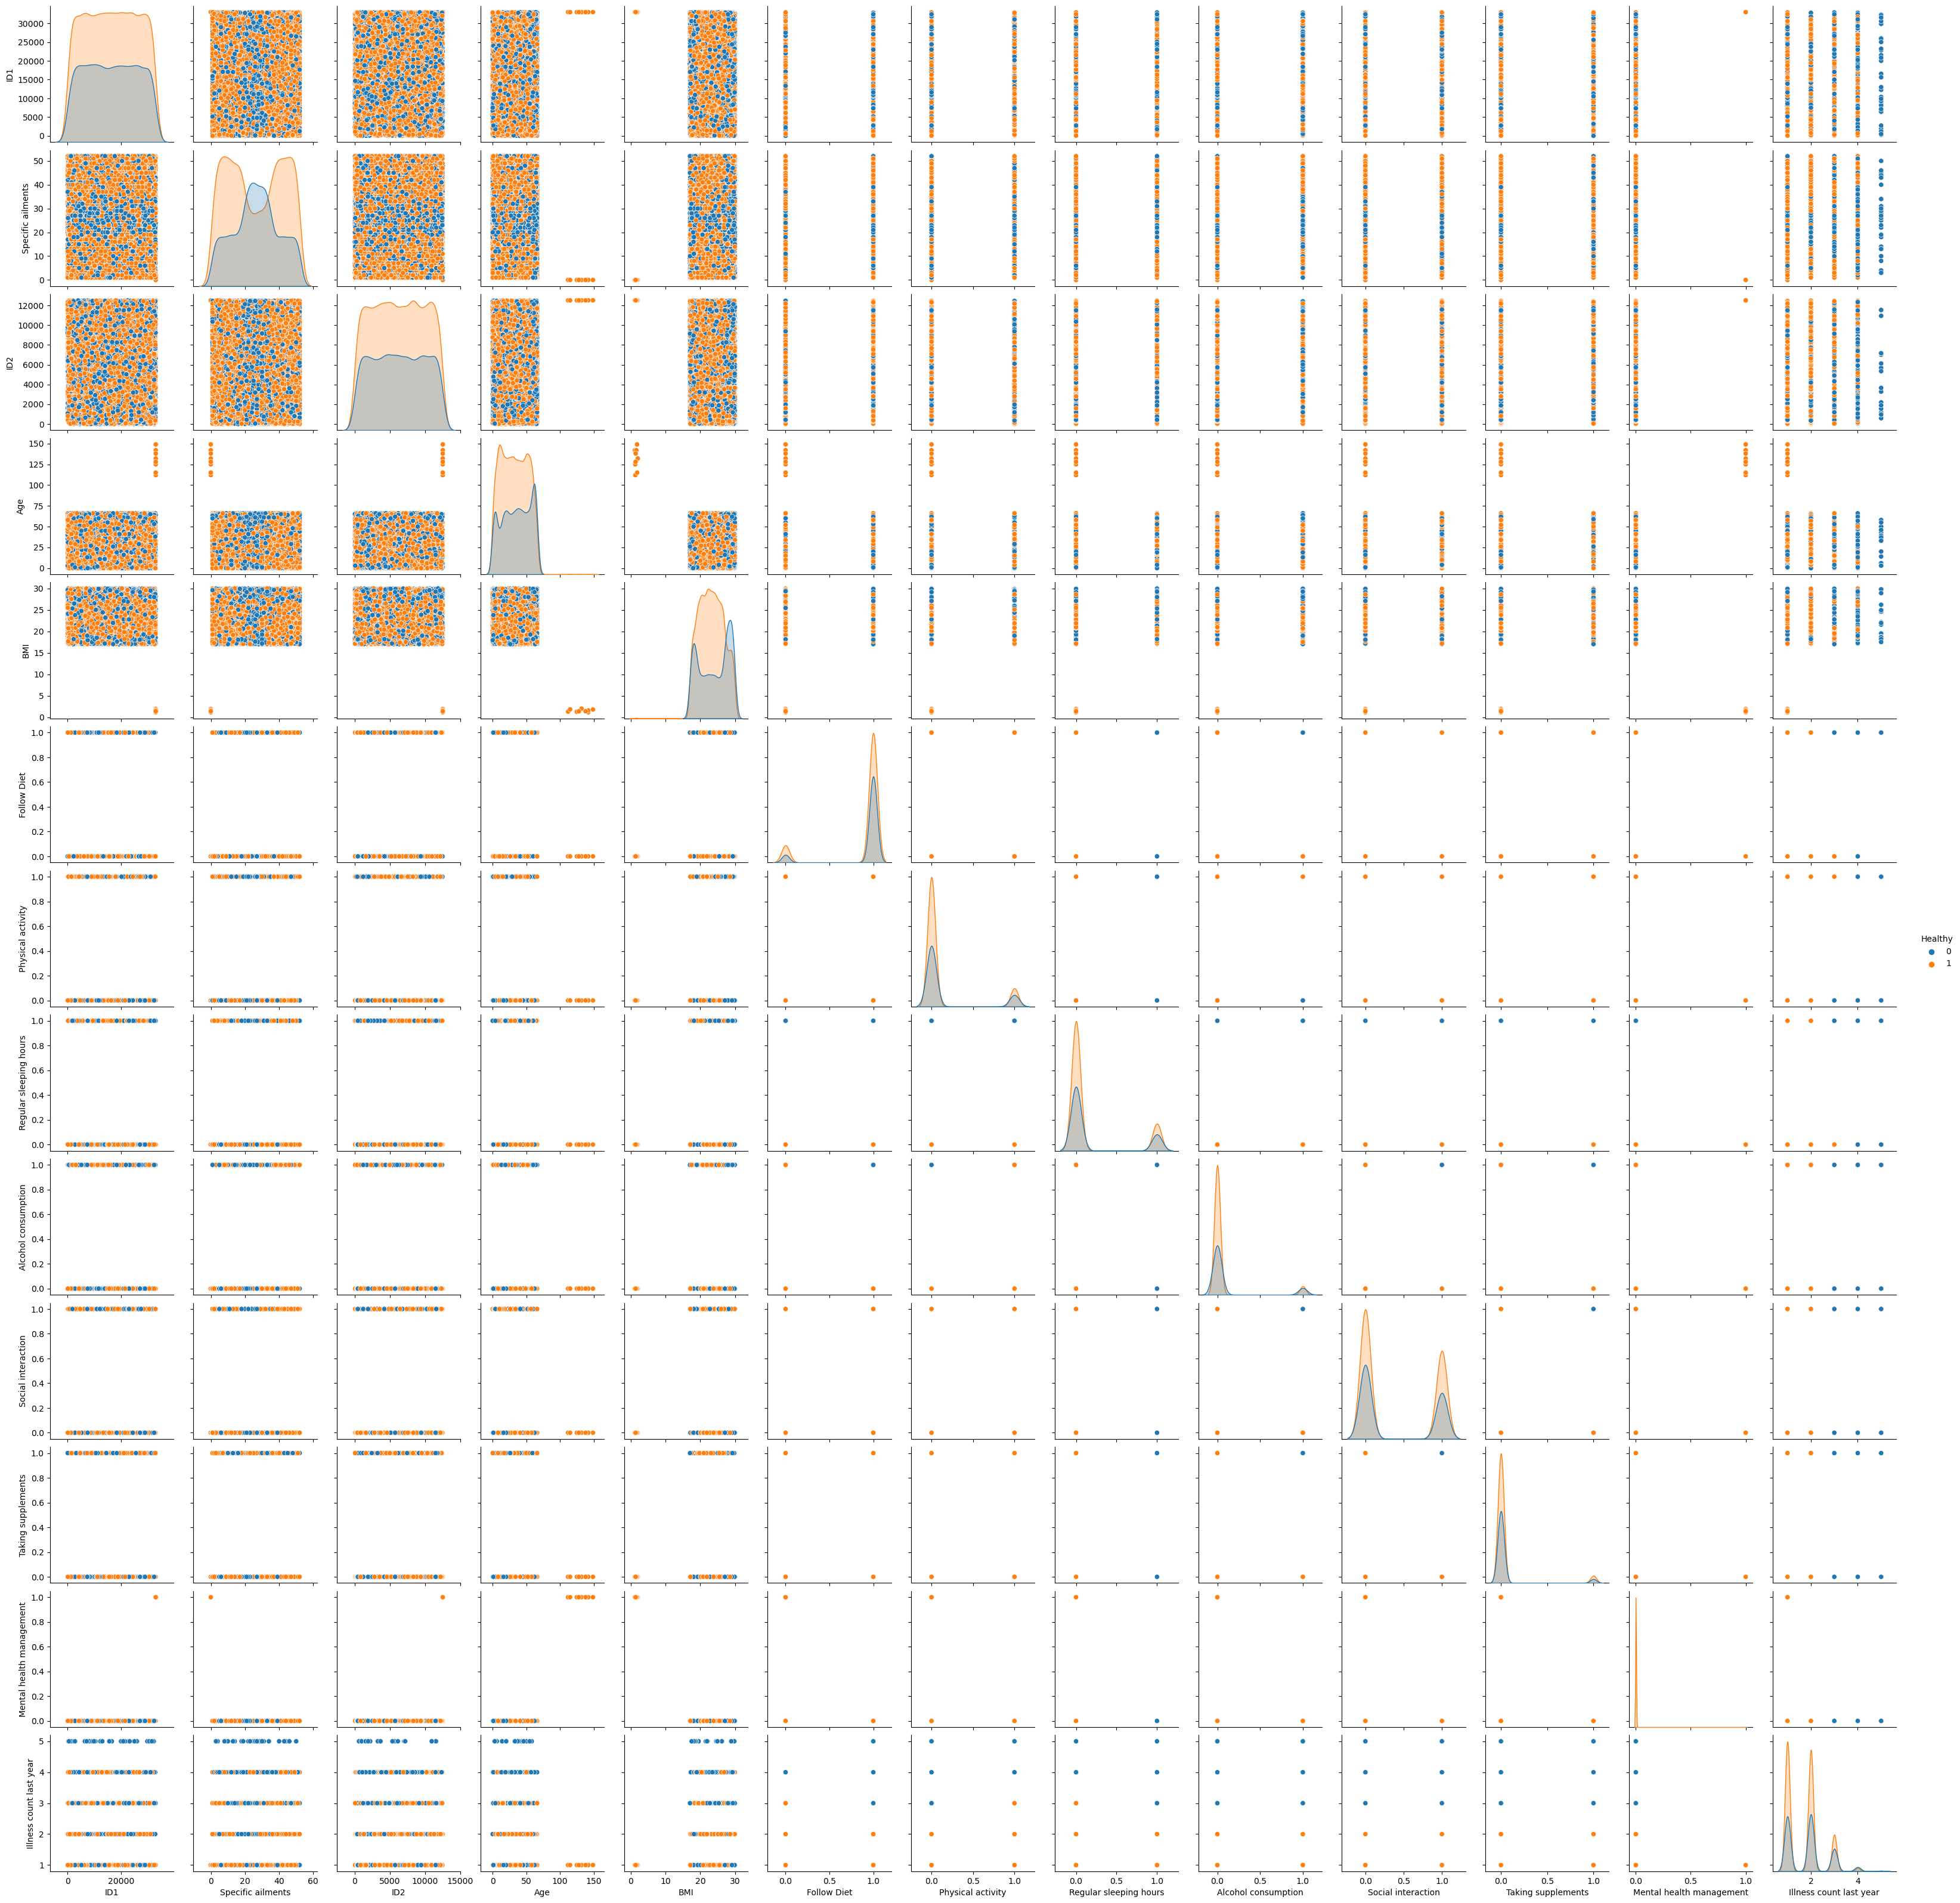

In [8]:
sns.pairplot(train_df, hue = 'Healthy')

(array([ 9620.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

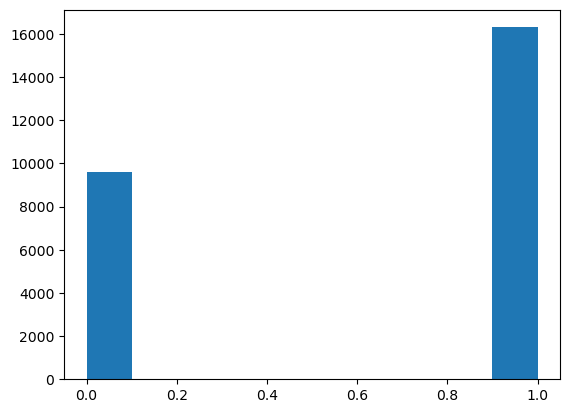

In [9]:
# histogram
plt.hist(train_df["Healthy"])

In [10]:
train_df["Healthy"].value_counts()


1    16300
0     9620
Name: Healthy, dtype: int64

# Split input and target variable

In [11]:
train_df.columns[0:17]

Index(['ID1', 'Specific ailments', 'ID2', 'Food preference', 'Age', 'BMI',
       'Smoker?', 'Living in?', 'Any heriditary condition?', 'Follow Diet',
       'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
       'Social interaction', 'Taking supplements', 'Mental health management',
       'Illness count last year'],
      dtype='object')

In [12]:
y = train_df.Healthy
train_df = train_df[train_df.columns[0:17]]
X = train_df

In [13]:
X.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [14]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Healthy, dtype: int64

In [15]:
test_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,23747,21,3612,DX3,27,28.880884,NO,URBAN,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6476,26138,27,4169,DX3,8,20.358229,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6477,7536,39,8525,DX6,29,27.365294,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6478,29410,29,1866,DX5,65,22.546412,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
merged_df = pd.concat([train_df, test_df], ignore_index=True)
merged_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,23747,21,3612,DX3,27,28.880884,NO,URBAN,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
32396,26138,27,4169,DX3,8,20.358229,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
32397,7536,39,8525,DX6,29,27.365294,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32398,29410,29,1866,DX5,65,22.546412,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
train_df = merged_df
X = train_df

In [18]:
train_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,23747,21,3612,DX3,27,28.880884,NO,URBAN,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
32396,26138,27,4169,DX3,8,20.358229,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
32397,7536,39,8525,DX6,29,27.365294,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32398,29410,29,1866,DX5,65,22.546412,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Shape of datasets

In [19]:
train_df.shape

(32400, 17)

# Information of datasets

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32400 entries, 0 to 32399
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        32400 non-null  int64  
 1   Specific ailments          32400 non-null  int64  
 2   ID2                        32400 non-null  int64  
 3   Food preference            32387 non-null  object 
 4   Age                        32400 non-null  int64  
 5   BMI                        32400 non-null  float64
 6   Smoker?                    32400 non-null  object 
 7   Living in?                 32400 non-null  object 
 8   Any heriditary condition?  32400 non-null  object 
 9   Follow Diet                31165 non-null  float64
 10  Physical activity          31165 non-null  float64
 11  Regular sleeping hours     31165 non-null  float64
 12  Alcohol consumption        31165 non-null  float64
 13  Social interaction         31165 non-null  flo

In [21]:
train_df.isnull().sum()

ID1                             0
Specific ailments               0
ID2                             0
Food preference                13
Age                             0
BMI                             0
Smoker?                         0
Living in?                      0
Any heriditary condition?       0
Follow Diet                  1235
Physical activity            1235
Regular sleeping hours       1235
Alcohol consumption          1235
Social interaction           1235
Taking supplements           1235
Mental health management     1235
Illness count last year      1235
dtype: int64

# Check percentage of present null value

In [22]:
train_df.isna().sum()/len(train_df)

ID1                          0.000000
Specific ailments            0.000000
ID2                          0.000000
Food preference              0.000401
Age                          0.000000
BMI                          0.000000
Smoker?                      0.000000
Living in?                   0.000000
Any heriditary condition?    0.000000
Follow Diet                  0.038117
Physical activity            0.038117
Regular sleeping hours       0.038117
Alcohol consumption          0.038117
Social interaction           0.038117
Taking supplements           0.038117
Mental health management     0.038117
Illness count last year      0.038117
dtype: float64

# Descriptive Summary of numeric columns

In [23]:
train_df.describe()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
count,32400.000000,32400.000000,32400.000000,32400.000000,32400.000000,31165.000000,31165.000000,31165.000000,31165.000000,31165.000000,31165.000000,31165.000000,31165.000000
mean,16501.732654,26.489877,6251.240093,33.221049,23.447498,0.896519,0.138136,0.184502,0.084710,0.395091,0.053457,0.000417,1.752832
std,9532.221029,15.050380,3607.014150,19.528955,3.796647,0.304592,0.345048,0.387899,0.278455,0.488878,0.224947,0.020420,0.770582
min,1.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8237.750000,13.000000,3145.750000,16.000000,20.197874,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,16500.500000,26.000000,6243.000000,33.000000,23.387824,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,24762.250000,40.000000,9380.250000,50.000000,26.774765,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


# Descriptive summary of categorical columns

In [24]:
train_df.describe(include="object")

,Food preference,Smoker?,Living in?,Any heriditary condition?
count,32387,32400,32400,32400
unique,32,3,2,1
top,DX6,NO,RURAL,Stable
freq,12068,18579,22636,32400


# Check datatype of datasets

In [25]:
train_df.dtypes

ID1                            int64
Specific ailments              int64
ID2                            int64
Food preference               object
Age                            int64
BMI                          float64
Smoker?                       object
Living in?                    object
Any heriditary condition?     object
Follow Diet                  float64
Physical activity            float64
Regular sleeping hours       float64
Alcohol consumption          float64
Social interaction           float64
Taking supplements           float64
Mental health management     float64
Illness count last year      float64
dtype: object

# Preprocessing 

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [27]:
imputer=SimpleImputer(strategy="mean")
scaler=StandardScaler()
encoder=OneHotEncoder(handle_unknown="ignore",sparse=False)
le= LabelEncoder()

# Separate the numerical and categorical columns in input variables

In [28]:
X_num=X.select_dtypes(include="number")
X_cat=X.select_dtypes(include="object")

# Simple imputer for dealing with missing value

<Axes: >

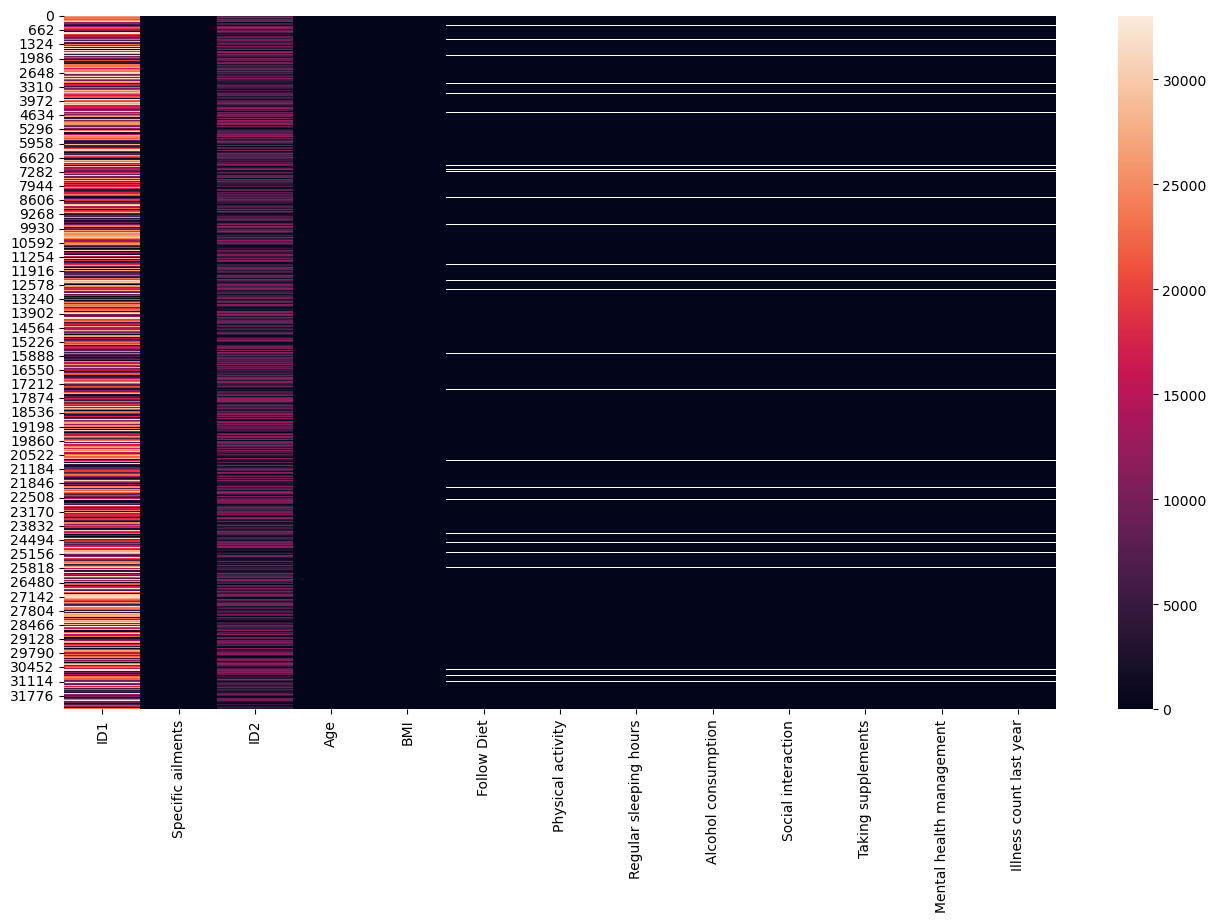

In [29]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(X_num)

In [30]:
X[X_num.columns]=imputer.fit_transform(X_num)

In [31]:
imputer.statistics_

array([1.65017327e+04, 2.64898765e+01, 6.25124009e+03, 3.32210494e+01,
       2.34474984e+01, 8.96518530e-01, 1.38135729e-01, 1.84501845e-01,
       8.47104123e-02, 3.95090647e-01, 5.34574041e-02, 4.17134606e-04,
       1.75283170e+00])

In [32]:
imputer.statistics_.shape

(13,)

### These value are the mean of each column and fill in the place of missing values

In [33]:
X[X_num.columns]

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,2408.0,44.0,2668.0,49.0,20.500470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,25063.0,39.0,10363.0,20.0,26.076580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26798.0,29.0,132.0,1.0,21.420866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31907.0,27.0,10499.0,30.0,25.203247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,26412.0,9.0,7963.0,40.0,19.355846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,23747.0,21.0,3612.0,27.0,28.880884,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
32396,26138.0,27.0,4169.0,8.0,20.358229,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
32397,7536.0,39.0,8525.0,29.0,27.365294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32398,29410.0,29.0,1866.0,65.0,22.546412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### We can easily see tha each missing value fill with that columns mean

# Check null value in numeric columns after using simple imputer

In [34]:
X[X_num.columns].isna().sum()

ID1                         0
Specific ailments           0
ID2                         0
Age                         0
BMI                         0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
dtype: int64

<Axes: >

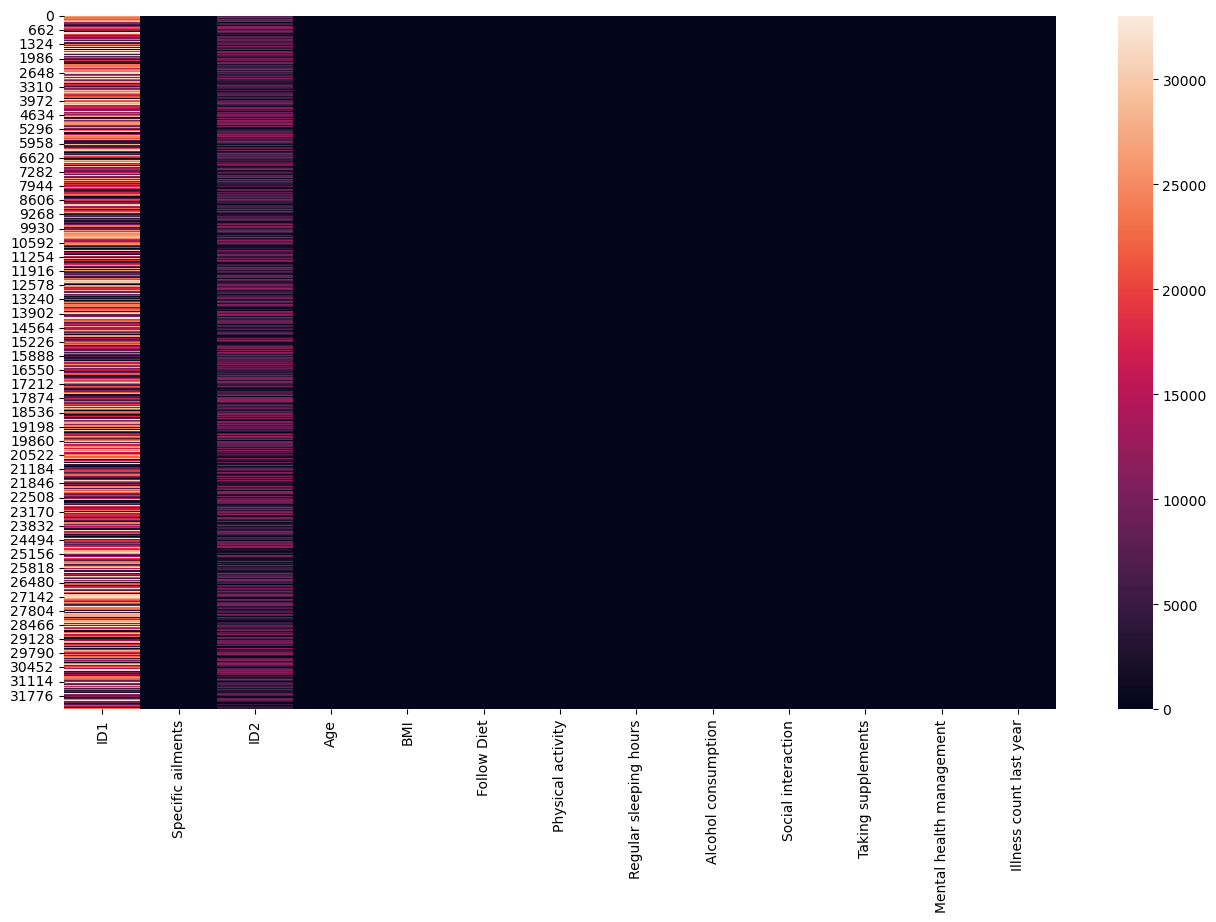

In [35]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(X[X_num.columns])

### We can easily see no null value present after imputing

# Standaridzed the numeric columns of input variables

In [36]:
X[X_num.columns]=scaler.fit_transform(X[X_num.columns])

In [37]:
X[X_num.columns].describe()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
count,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04,3.240000e+04
mean,-1.662319e-16,-7.631755e-17,1.096517e-16,1.600914e-16,-3.464992e-17,2.644798e-16,-2.105312e-17,1.282924e-17,-9.166879e-17,9.276530e-17,3.859738e-17,5.263280e-18,1.588853e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.731075e+00,-1.760107e+00,-1.732828e+00,-1.701144e+00,-5.889023e+00,-3.001147e+00,-4.081995e-01,-4.849844e-01,-3.101902e-01,-8.240284e-01,-2.423108e-01,-2.082896e-02,-9.961509e-01
25%,-8.669659e-01,-8.963285e-01,-8.609720e-01,-8.818350e-01,-8.559326e-01,3.464101e-01,-4.081995e-01,-4.849844e-01,-3.101902e-01,-8.240284e-01,-2.423108e-01,-2.082896e-02,-9.961509e-01
50%,-1.293165e-04,-3.254962e-02,-2.284499e-03,-1.131923e-02,-1.571791e-02,3.464101e-01,-4.081995e-01,-4.849844e-01,-3.101902e-01,-8.240284e-01,-2.423108e-01,-2.082896e-02,3.270544e-01
75%,8.666023e-01,8.976738e-01,8.674926e-01,8.591965e-01,8.763834e-01,3.464101e-01,-4.081995e-01,-4.849844e-01,-3.101902e-01,1.261641e+00,-2.423108e-01,-2.082896e-02,3.270544e-01
max,1.732285e+00,1.695008e+00,1.736577e+00,5.928671e+00,1.725781e+00,3.464101e-01,2.546862e+00,2.143631e+00,3.351582e+00,1.261641e+00,4.290472e+00,4.991260e+01,4.296670e+00


### We can easly see that all columns has mean zero and standard deviaion 1.

# Label Encoder

In [38]:
for column in X_cat:
    X[column]=le.fit_transform(X[column])

In [39]:
X

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,-1.478559,1.163452,-0.993424,31,0.807990,-0.776231,1,0,0,0.346410,-0.408200,-0.484984,-0.31019,-0.824028,-0.242311,-0.020829,-0.996151
1,0.898154,0.831229,1.139952,25,-0.677008,0.692485,1,1,0,-3.001147,-0.408200,-0.484984,-0.31019,1.261641,-0.242311,-0.020829,-0.996151
2,1.080171,0.166784,-1.696510,31,-1.649937,-0.533804,1,1,0,0.346410,-0.408200,-0.484984,-0.31019,-0.824028,-0.242311,-0.020829,-0.996151
3,1.616151,0.033895,1.177657,0,-0.164940,0.462454,1,0,0,0.346410,-0.408200,-0.484984,-0.31019,-0.824028,-0.242311,-0.020829,-0.996151
4,1.039676,-1.162107,0.474572,31,0.347128,-1.077718,2,0,0,0.346410,-0.408200,-0.484984,-0.31019,1.261641,-0.242311,-0.020829,0.327054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,0.760093,-0.364772,-0.731708,24,-0.318560,1.431123,1,1,0,0.346410,2.546862,-0.484984,-0.31019,1.261641,-0.242311,-0.020829,1.650260
32396,1.010931,0.033895,-0.577284,24,-1.291489,-0.813696,1,0,0,0.346410,2.546862,-0.484984,-0.31019,1.261641,-0.242311,-0.020829,1.650260
32397,-0.940586,0.831229,0.630382,31,-0.216146,1.031925,1,0,0,-3.001147,-0.408200,-0.484984,-0.31019,1.261641,-0.242311,-0.020829,-0.996151
32398,1.354193,0.166784,-1.215772,30,1.627299,-0.237341,2,1,0,0.346410,-0.408200,-0.484984,-0.31019,-0.824028,-0.242311,-0.020829,-0.996151


# Applying PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca1=PCA(n_components=16)

In [42]:
pca_fit = pca1.fit_transform(X)

In [43]:
pca1.explained_variance_ratio_  #F_statistics of each columns

array([8.81381589e-01, 1.65812626e-02, 1.05805714e-02, 9.58556995e-03,
       9.07491616e-03, 8.99971572e-03, 8.97770491e-03, 8.88034954e-03,
       8.74769684e-03, 8.70648118e-03, 8.67569652e-03, 8.55767468e-03,
       7.47375795e-03, 1.93033223e-03, 1.84668135e-03, 2.00794182e-33])

In [44]:
sum(pca1.explained_variance_ratio_)   # percentage explained by pca

0.9999999999999999

In [45]:
pca_fit = pd.DataFrame(pca_fit)

In [46]:
pca_fit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-7.710887,-1.482756,-0.060109,0.170933,0.251013,0.482827,0.804179,0.774260,0.674137,1.391117,-0.442679,1.256114,-0.190762,0.425321,-0.459587,2.403767e-15
1,-1.714055,-0.487840,1.016642,-3.043179,-0.405348,-0.018595,-1.128061,0.479143,0.801922,-0.799649,0.812664,-1.333701,0.084112,0.506333,0.590822,-3.581604e-15
2,-7.712655,-1.392505,-0.842021,0.264303,0.611509,-0.756296,-1.723060,-0.495253,-0.154481,0.935002,1.071711,0.755108,0.292802,0.279716,0.612164,-1.680547e-15
3,23.290107,-1.502436,-0.101043,0.580310,-0.621294,0.032718,-0.770676,-0.335141,0.316193,-1.209573,0.741371,-0.932546,0.009236,0.313020,-0.386188,4.609081e-16
4,-7.705461,0.354773,0.902913,0.050317,-0.864609,-0.166316,-0.611832,-0.721726,-1.038741,-1.037765,-0.016265,0.759412,-1.054542,-0.554525,-0.123171,3.445341e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,-0.705232,2.152602,-1.038156,-0.263670,-1.445169,-2.373155,0.283112,-0.726913,0.045553,0.023823,0.060487,-0.205987,0.768777,0.559668,0.564851,-8.764219e-17
32396,-0.705701,2.239487,-0.461902,0.260993,-1.500894,-2.164519,-1.486793,0.182409,-0.145458,0.694684,0.122986,0.383548,-0.102227,0.100384,-0.331232,-3.616403e-16
32397,-7.713501,-0.515509,0.787234,-3.454517,-0.037714,0.239767,0.134686,0.929638,0.564879,-0.063318,-0.111978,-0.946155,0.434958,0.295088,-0.399973,-5.267805e-17
32398,-6.709509,-1.510486,0.462761,0.676643,0.040210,-0.502726,0.705783,-1.324153,0.910978,0.083199,0.987438,0.839987,-0.821324,-0.085703,0.733566,2.061933e-16


In [47]:
# Splitting the DataFrame by rows
train_pca = pca_fit.iloc[:25920]
test_pca = pca_fit.iloc[25920:]

In [48]:
train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-7.710887,-1.482756,-0.060109,0.170933,0.251013,0.482827,0.804179,0.774260,0.674137,1.391117,-0.442679,1.256114,-0.190762,0.425321,-0.459587,2.403767e-15
1,-1.714055,-0.487840,1.016642,-3.043179,-0.405348,-0.018595,-1.128061,0.479143,0.801922,-0.799649,0.812664,-1.333701,0.084112,0.506333,0.590822,-3.581604e-15
2,-7.712655,-1.392505,-0.842021,0.264303,0.611509,-0.756296,-1.723060,-0.495253,-0.154481,0.935002,1.071711,0.755108,0.292802,0.279716,0.612164,-1.680547e-15
3,23.290107,-1.502436,-0.101043,0.580310,-0.621294,0.032718,-0.770676,-0.335141,0.316193,-1.209573,0.741371,-0.932546,0.009236,0.313020,-0.386188,4.609081e-16
4,-7.705461,0.354773,0.902913,0.050317,-0.864609,-0.166316,-0.611832,-0.721726,-1.038741,-1.037765,-0.016265,0.759412,-1.054542,-0.554525,-0.123171,3.445341e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,-7.708575,-1.545126,-0.190869,-0.053659,0.797655,-0.268261,2.136452,-0.570819,-0.665896,0.937693,-0.836868,0.746724,0.076644,-0.431091,-0.211508,-6.424908e-17
25916,-7.710787,-1.451543,-0.825747,0.148165,-0.644071,0.518957,-0.680215,0.611758,0.506594,-0.942518,0.253151,-1.050463,0.712020,0.178196,-0.365988,-2.332433e-16
25917,23.290355,0.336720,-1.963154,0.071554,-0.555419,-1.675932,0.391633,1.116450,0.809879,1.791922,-0.491185,-0.619080,1.555983,0.095018,-0.360060,-3.684670e-17
25918,23.290597,1.341430,1.635891,-0.496124,0.122165,-0.857536,1.546335,3.818473,1.288114,0.627921,1.949594,-2.390526,-0.783949,0.526109,-0.445324,-2.390095e-16


# Split the dataset into train/test for model evalution

In [49]:
from sklearn.model_selection import train_test_split 

In [50]:
X_train,X_test,y_train,y_test=train_test_split(train_pca,y,test_size=0.4,random_state=42)

In [51]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (15552, 16)
X_test (10368, 16)
y_train (15552,)
y_test (10368,)


# Modelling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
## Evaluatig the algorithm

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Create a model with Logistic Regression


In [54]:
lr =LogisticRegression(class_weight= 'balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [55]:
probs = lr.predict_proba(X_test)

In [56]:
probs = probs[:,1]

In [57]:
thresh = 0.55
yh = np.zeros_like(probs)
for i in range(len(probs)):
    if probs[i] >= thresh:
        yh[i] = 1
    else:
        yh[i] = 0

y_pred1 = yh
print("ACC LR",accuracy_score(y_test,y_pred1))
print("F1 LR",f1_score(y_test,y_pred1,average='macro'))

ACC LR 0.6306905864197531
F1 LR 0.6272437131469097


In [58]:
y_pred1=lr.predict(X_test)

In [59]:
print("ACC LR",accuracy_score(y_test,y_pred1))

ACC LR 0.6599151234567902


In [60]:
print("F1 LR",f1_score(y_test,y_pred1,average='macro'))

F1 LR 0.6489300662502281


# Other Models

In [61]:
# Model training
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

svc=SVC()
svc.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


rm=RandomForestClassifier()
rm.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
## checking the prediction on the test data

y_pred2=knn.predict(X_test)
y_pred3=svc.predict(X_test)
y_pred4=dt.predict(X_test)
y_pred5=rm.predict(X_test)
y_pred6=gb.predict(X_test)


In [63]:
print("ACC KNN",accuracy_score(y_test,y_pred2))
print("ACC SVM",accuracy_score(y_test,y_pred3))
print("ACC DT",accuracy_score(y_test,y_pred4))
print("ACC RM",accuracy_score(y_test,y_pred5))
print("ACC GB",accuracy_score(y_test,y_pred6))

ACC KNN 0.7264660493827161
ACC SVM 0.7420910493827161
ACC DT 0.6959876543209876
ACC RM 0.7724729938271605
ACC GB 0.7639853395061729


In [58]:
print("F1 KNN",f1_score(y_test,y_pred2,average='macro'))
print("F1 SVM",f1_score(y_test,y_pred3,average='macro'))
print("F1 DT",f1_score(y_test,y_pred4,average='macro'))
print("F1 RM",f1_score(y_test,y_pred5,average='macro'))
print("F1 GB",f1_score(y_test,y_pred6,average='macro'))

F1 KNN 0.6951297988703534
F1 SVM 0.6990226171366709
F1 DT 0.6748239848477272
F1 RM 0.7512105137886247
F1 GB 0.7373981497106215


# XG boost

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [60]:
xgb = XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    seed=24
)

In [61]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [62]:
y_pred7 = xgb.predict(X_test)

In [63]:
print("ACC XGB",accuracy_score(y_test,y_pred7))

ACC XGB 0.7798032407407407


In [64]:
print("F1 XGB",f1_score(y_test,y_pred7,average='macro'))

F1 XGB 0.7595213693629427


# Artificial Neural Network

In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Input
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [66]:
# Define your F1 score metric function
def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    return f1_score(y_true, y_pred, average='weighted')

In [67]:
tf.random.set_seed(1234) # for consistent results
ANN = Sequential(
    [               
         
        tf.keras.layers.InputLayer((16,)),
        tf.keras.layers.Dense(16, activation="relu", name="L1"),
        tf.keras.layers.Dense(32, activation="relu", name="L2"),
        tf.keras.layers.Dense(64, activation="relu", name="L3"),
        tf.keras.layers.Dense(32, activation="relu", name="L4"),
        tf.keras.layers.Dense(16, activation="relu", name="L5"),
        tf.keras.layers.Dense(8, activation="relu", name="L6"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="L7"),
        
    ], name = "my_model" 
)

In [68]:
ANN.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)


In [69]:
ANN.fit(X_train,y_train,epochs=300)

Epoch 1/300
486/486 [==============================] - 4s 3ms/step - loss: 0.6020
Epoch 2/300
486/486 [==============================] - 2s 4ms/step - loss: 0.5301
Epoch 3/300
486/486 [==============================] - 1s 3ms/step - loss: 0.5038
Epoch 4/300
486/486 [==============================] - 1s 3ms/step - loss: 0.4872
Epoch 5/300
486/486 [==============================] - 1s 3ms/step - loss: 0.4764
Epoch 6/300
486/486 [==============================] - 1s 3ms/step - loss: 0.4678
Epoch 7/300
486/486 [==============================] - 1s 2ms/step - loss: 0.4604
Epoch 8/300
486/486 [==============================] - 1s 2ms/step - loss: 0.4534
Epoch 9/300
486/486 [==============================] - 1s 2ms/step - loss: 0.4495
Epoch 10/300
486/486 [==============================] - 1s 2ms/step - loss: 0.4420
Epoch 11/300
486/486 [==============================] - 1s 3ms/step - loss: 0.4372
Epoch 12/300
486/486 [==============================] - 1s 2ms/step - loss: 0.4330
Epoch 13/300


486/486 [==============================] - 1s 2ms/step - loss: 0.2223
Epoch 197/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2212
Epoch 198/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2311
Epoch 199/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2216
Epoch 200/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2232
Epoch 201/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2290
Epoch 202/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2257
Epoch 203/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2213
Epoch 204/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2257
Epoch 205/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2247
Epoch 206/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2206
Epoch 207/300
486/486 [==============================] - 1s 2ms/step - loss: 0.2175
Epoch 

In [70]:
prediction = ANN.predict(X_test)

324/324 [==============================] - 1s 2ms/step


In [71]:
threshold = 0.5
yhat = np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i] >= threshold:
        yhat[i] = 1
    else:
        yhat[i] = 0

y_pred8 = yhat
print("ACC ANN",accuracy_score(y_test,y_pred8))
print("F1 ANN",f1_score(y_test,y_pred8,average='macro'))

ACC ANN 0.7559799382716049
F1 ANN 0.7379153597091466


# now apply the model on test datasets

In [72]:
test_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
25920,-7.718041,-0.434483,2.325457,-0.950501,0.337229,1.183693,-0.652238,-2.558816,-1.110720,2.962490,1.675455,-2.504855,-1.356613,-0.330641,0.801213,-1.952749e-16
25921,23.290876,-1.539478,0.407533,0.483179,0.410079,-0.111316,0.649635,-0.157508,-1.224597,0.385134,-0.775262,0.167844,-0.472980,0.711339,0.536501,-1.752547e-17
25922,-4.711087,-1.394868,0.049795,0.735342,-0.374733,0.420231,-1.841656,0.988060,0.086702,0.079534,0.254458,-0.007776,-0.460018,0.115018,-0.339590,-2.626579e-17
25923,-6.708446,0.435583,-1.186163,0.519359,0.840294,0.743925,0.590072,2.483777,-0.429191,-0.538134,2.290051,-0.403577,1.135155,0.124349,-0.371560,-2.078923e-16
25924,-1.711300,1.439561,0.192258,-1.165987,1.422243,-1.812571,0.530576,3.501039,-0.256766,1.984230,1.912009,-1.897546,0.397205,0.057347,-0.353057,-1.179682e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,-0.705232,2.152602,-1.038156,-0.263670,-1.445169,-2.373155,0.283112,-0.726913,0.045553,0.023823,0.060487,-0.205987,0.768777,0.559668,0.564851,-8.764219e-17
32396,-0.705701,2.239487,-0.461902,0.260993,-1.500894,-2.164519,-1.486793,0.182409,-0.145458,0.694684,0.122986,0.383548,-0.102227,0.100384,-0.331232,-3.616403e-16
32397,-7.713501,-0.515509,0.787234,-3.454517,-0.037714,0.239767,0.134686,0.929638,0.564879,-0.063318,-0.111978,-0.946155,0.434958,0.295088,-0.399973,-5.267805e-17
32398,-6.709509,-1.510486,0.462761,0.676643,0.040210,-0.502726,0.705783,-1.324153,0.910978,0.083199,0.987438,0.839987,-0.821324,-0.085703,0.733566,2.061933e-16


In [73]:
yh =xgb.predict(test_pca)

In [74]:
 yh

array([0, 1, 1, ..., 1, 0, 0])

In [75]:
submission_df = pd.DataFrame(yh, columns=['predictions'])

In [76]:
submission_df

,predictions
0,0
1,1
2,1
3,1
4,0
...,...
6475,1
6476,1
6477,1
6478,0


In [77]:
submission_df.to_csv("submission.csv",index=False)

In [78]:
pd.read_csv("submission.csv")

,predictions
0,0
1,1
2,1
3,1
4,0
...,...
6475,1
6476,1
6477,1
6478,0
